In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

from utils import config, utils

In [2]:
df, df_cv = utils.Utils.load_data(drop_neutral=True)

Test 1:
- lemmatizing: No
- Additional removal of words: No
- Remove URLs: No

In [3]:
nltk_rf_model_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_1"
)

In [4]:
# nltk_rf_model_1.fit(False)
# nltk_rf_model_1.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.9s
Classification Report for nltk_rf_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.70      0.98      0.82       129
    positive       0.98      0.71      0.82       181

    accuracy                           0.82       310
   macro avg       0.84      0.84      0.82       310
weighted avg       0.86      0.82      0.82       310

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.43      0.74      0.54       348
    positive       0.67      0.36      0.47       528

    accuracy                           0.51       876
   macro avg       0.55      0.55      0.51       876
weighted avg       0.58      0.51      0.50       876



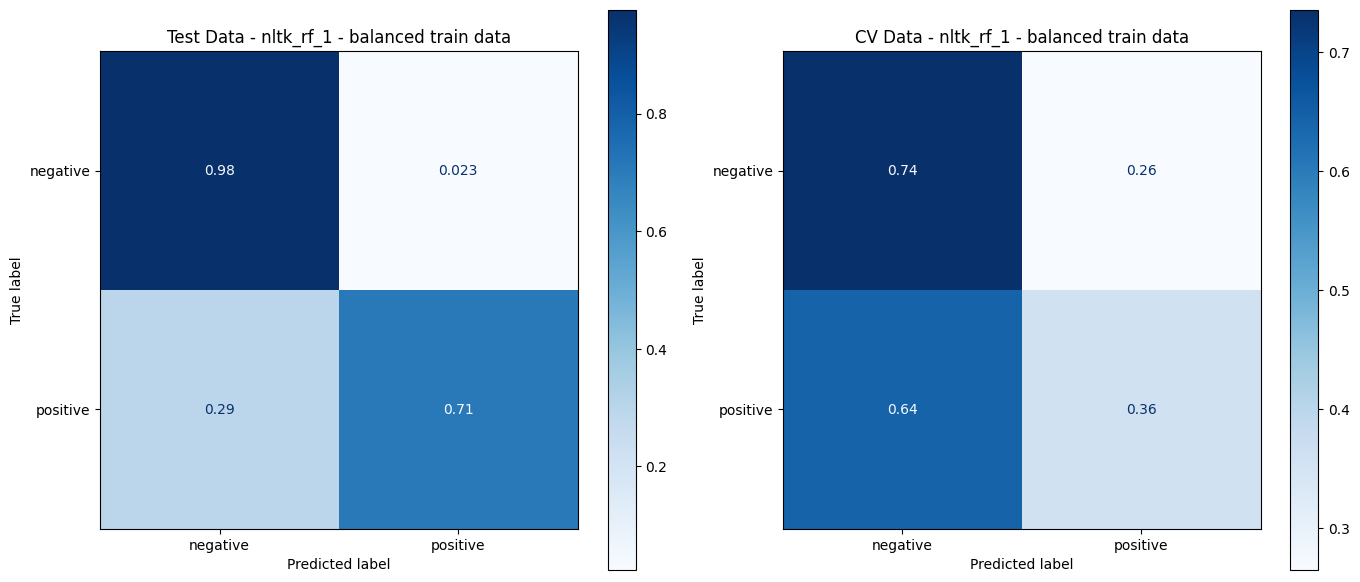

In [5]:
nltk_rf_model_1.fit(True)
nltk_rf_model_1.evaluate(True)

In [6]:
nltk_rf_model_1.dump(config.MODEL_DIR)

Test 2:
- Lemmatizing: No
- Additional reomval of words: Yes
- Remove Urls: No

In [7]:
nltk_rf_model_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=False)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_2"
)

In [8]:
# nltk_rf_model_2.fit(False)
# nltk_rf_model_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.7s
Classification Report for nltk_rf_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.71      0.98      0.83       129
    positive       0.98      0.72      0.83       181

    accuracy                           0.83       310
   macro avg       0.85      0.85      0.83       310
weighted avg       0.87      0.83      0.83       310

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.43      0.78      0.56       348
    positive       0.69      0.32      0.43       528

    accuracy                           0.50       876
   macro avg       0.56      0.55      0.49       876
weighted avg       0.59      0.50      0.48       876



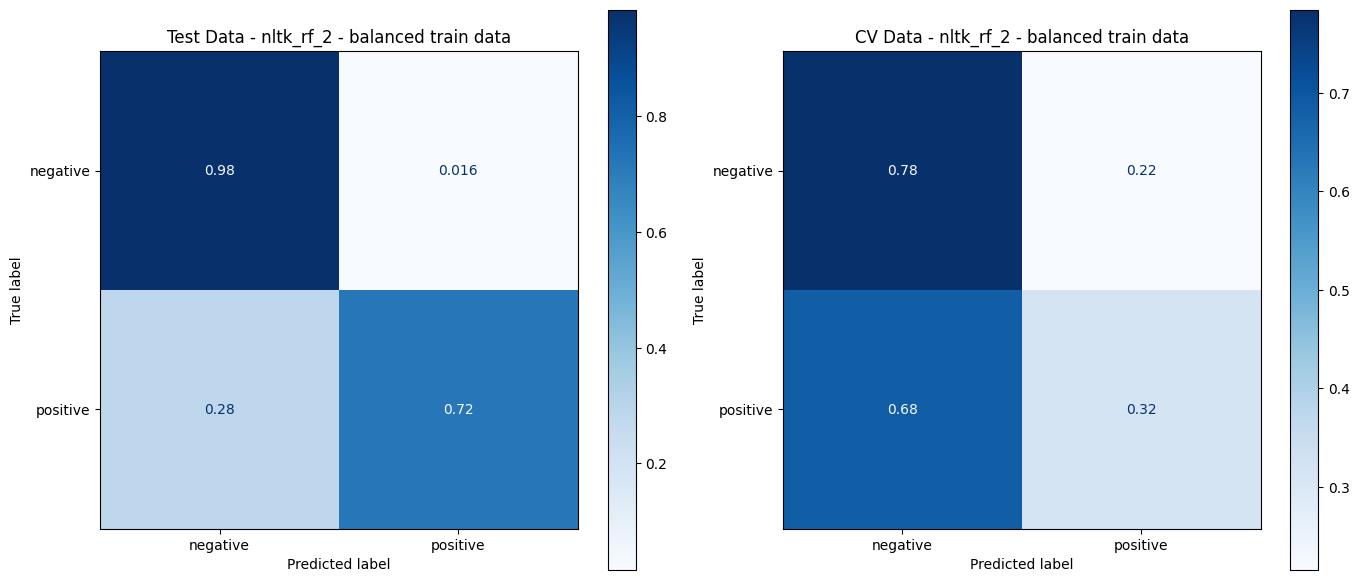

In [9]:
nltk_rf_model_2.fit(True)
nltk_rf_model_2.evaluate(True)

Test 3
- Lemmatizing: Yes
- Additional removal of words: Yes
- Remove URLs: Yes

In [10]:
nltk_rf_model_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv = df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
             transformers=[
                (f'nltk_{feature}', Pipeline([
                ('compound_splitter', utils.CompoundWordSplitter()),
                ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=True, remove_urls=True)),
                ('tfidf', TfidfVectorizer())
            ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", RandomForestClassifier(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_rf_3"
)

In [11]:
# nltk_rf_model_3.fit(False)
# nltk_rf_model_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   2.3s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.5s
Classification Report for nltk_rf_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.76      0.97      0.85       129
    positive       0.97      0.78      0.87       181

    accuracy                           0.86       310
   macro avg       0.86      0.87      0.86       310
weighted avg       0.88      0.86      0.86       310

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.46      0.67      0.55       348
    positive       0.69      0.48      0.57       528

    accuracy                           0.56       876
   macro avg       0.57      0.58      0.56       876
weighted avg       0.60      0.56      0.56       876



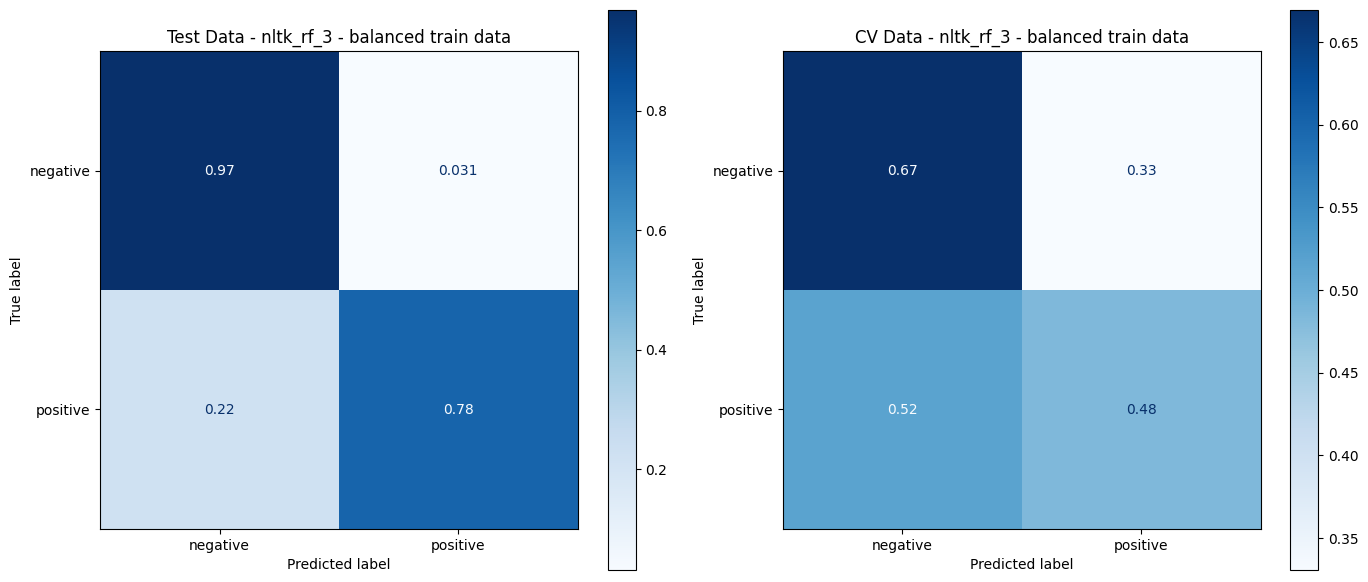

In [12]:
nltk_rf_model_3.fit(True)
nltk_rf_model_3.evaluate(True)